In [46]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import matplotlib as mpl
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MeanShift,estimate_bandwidth
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
# 允许多行输出
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
names = ["fbpid"
,"fuid"
,"sys_sum"
,"sys_percent"
,"win_sum"
,"win_percent"
,"pay_sum"
,"pay_percent"
,"change_sum"
,"change_percent"
,"coin_total"
,"primary_total_time"
,"primary_total_count"
,"primary_percent"
,"practice_total_time"
,"practice_total_count"
,"practice_percent"
,"native_total_time"
,"native_total_count"
,"native_percent"
,"middle_total_time"
,"middle_total_count"
,"middle_percent"
,"high_total_time"
,"high_total_count"
,"high_percent"
,"master_total_time"
,"master_total_count"
,"master_percent"
,"dt"]
data = pd.read_csv('./sirendoudizhu.csv',names=names,skiprows=1)
data.dropna(inplace=True)

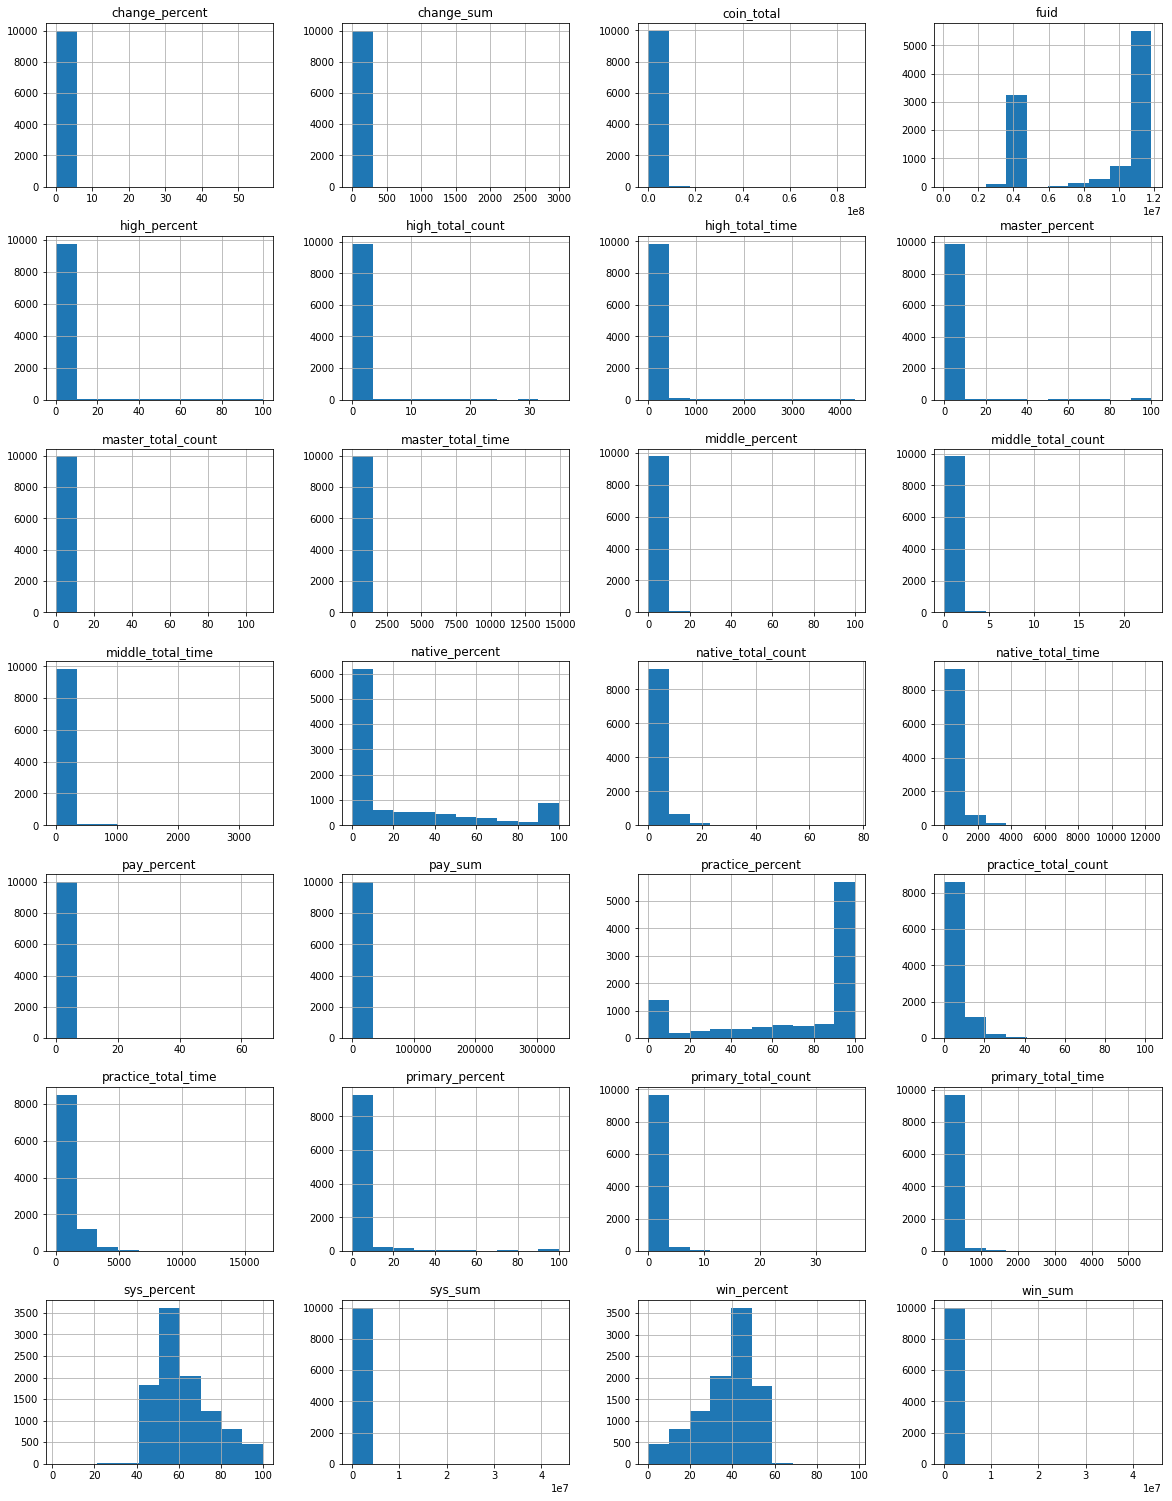

In [3]:
data.hist(sharex=False,sharey=False,figsize=(20,50),layout=(13,4));

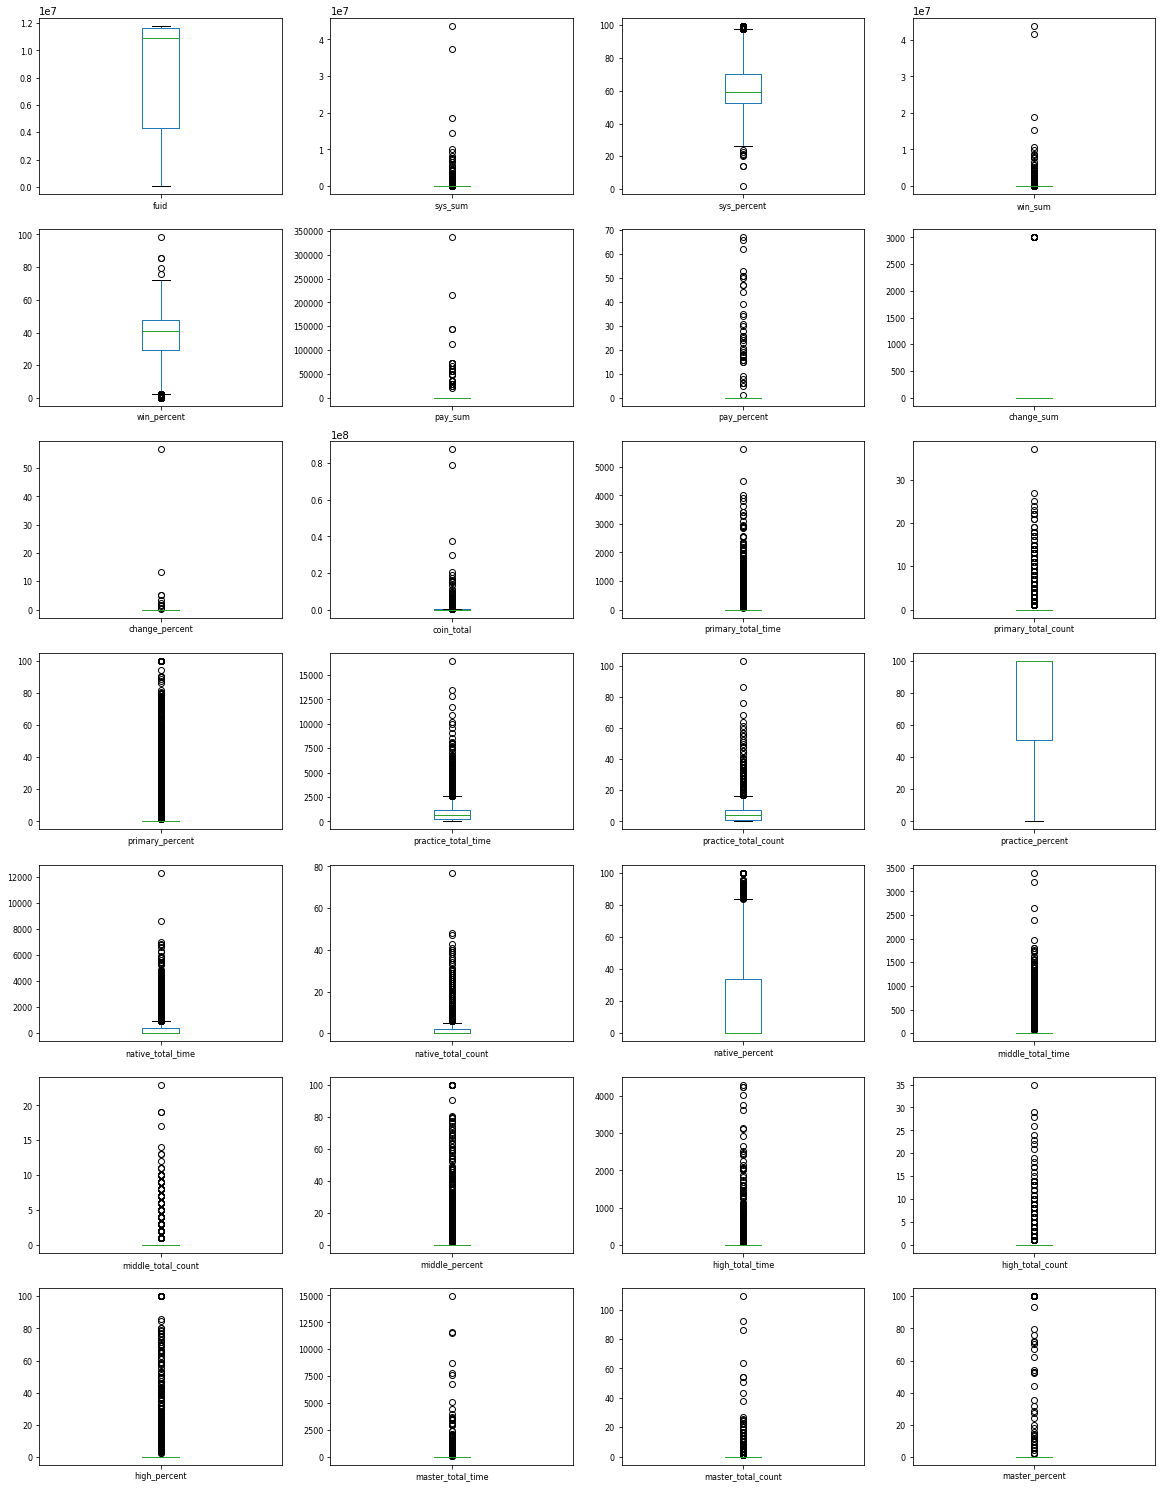

In [4]:
data.plot(kind='box',subplots=True,layout=(13,4),figsize=(20,50),sharex=False,sharey=False,fontsize=8);

In [5]:
x_label = ["sys_percent","win_percent","pay_percent","change_percent","primary_percent","practice_percent","native_percent","middle_percent","high_percent","master_percent"]
X = data[x_label].values

In [6]:
def silhouetteScore(X2,n1,n2,model):
    score_list = {}
    for k in range(n1,n2):
        temp = model(n_clusters=k).fit_predict(X2)
        score = metrics.silhouette_score(X2,temp)
        score_list[k] = score
    pd.Series(score_list).plot();

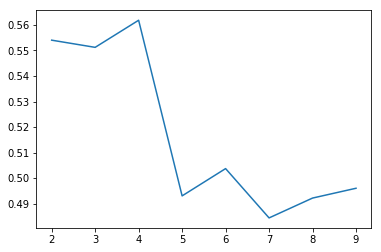

In [7]:
silhouetteScore(X,2,10,AgglomerativeClustering)

In [8]:
labels1 = AgglomerativeClustering(n_clusters=4).fit_predict(X)
data['label1'] = labels1

In [9]:
data.groupby('label1').size()

label1
0    6149
1     526
2    1176
3    2149
dtype: int64

In [10]:
cluster_features = []
for line in range(4):
    label_data = data[data['label1']== line]
    part1_data = label_data[x_label]
    part1_desc = part1_data.describe().round(3)
    merge_data1 = part1_desc.iloc[1]
    cluster_features.append(merge_data1)
cluster_pd = pd.DataFrame(cluster_features).T
cluster_pd

,mean,mean,mean,mean
sys_percent,68.403,49.999,54.012,53.923
win_percent,31.544,49.943,45.969,45.703
pay_percent,0.039,0.053,0.018,0.365
change_percent,0.013,0.003,0.000,0.003
primary_percent,0.091,38.685,1.464,3.670
practice_percent,98.559,6.984,4.057,55.725
native_percent,1.348,7.150,93.966,38.820
middle_percent,0.002,13.453,0.085,1.240
high_percent,0.000,19.195,0.428,0.488
master_percent,0.000,14.534,0.000,0.058


In [11]:
label_ms = ["sys_sum"
,"sys_percent"
,"win_sum"
,"win_percent"
,"pay_sum"
,"pay_percent"
,"change_sum"
,"change_percent"
,"coin_total"
,"primary_total_count"
,"primary_percent"
,"practice_total_count"
,"practice_percent"
,"native_total_count"
,"native_percent"
,"middle_total_count"
,"middle_percent"
,"high_total_count"
,"high_percent"
,"master_total_count"
,"master_percent"]

In [12]:
pd.pivot_table(pd.concat((data[label_ms],data['label1']),axis=1),columns=['label1'],aggfunc=(np.average,np.sum))

label1                                   0             1             2  \
change_percent       average  1.332820e-02  3.045057e-03  0.000000e+00   
                     sum      8.195510e+01  1.601700e+00  0.000000e+00   
change_sum           average  2.439421e+00  1.140684e+01  0.000000e+00   
                     sum      1.500000e+04  6.000000e+03  0.000000e+00   
coin_total           average  2.570148e+04  1.430944e+06  1.224771e+05   
                     sum      1.580384e+08  7.526767e+08  1.440331e+08   
high_percent         average  0.000000e+00  1.919484e+01  4.284338e-01   
                     sum      0.000000e+00  1.009649e+04  5.038382e+02   
high_total_count     average  0.000000e+00  1.832700e+00  5.357143e-02   
                     sum      0.000000e+00  9.640000e+02  6.300000e+01   
master_percent       average  0.000000e+00  1.453418e+01  0.000000e+00   
                     sum      0.000000e+00  7.644980e+03  0.000000e+00   
master_total_count   average  0.000000e+00  2.488593e+00  0.000000e+00   
                     sum      0.000000e+00  1.309000e+03  0.000000e+00   
middle_percent       average  1.909205e-03  1.345315e+01  8.463861e-02   
                     sum      1.173970e+01  7.076358e+03  9.953500e+01   
middle_total_count   average  1.626281e-04  1.138783e+00  9.353741e-03   
                     sum      1.000000e+00  5.990000e+02  1.100000e+01   
native_percent       average  1.348436e+00  7.149697e+00  9.396577e+01   
                     sum      8.291530e+03  3.760741e+03  1.105037e+05   
native_total_count   average  1.686453e-01  9.448669e-01  6.320578e+00   
                     sum      1.037000e+03  4.970000e+02  7.433000e+03   
pay_percent          average  3.935599e-02  5.323194e-02  1.785714e-02   
                     sum      2.420000e+02  2.800000e+01  2.100000e+01   
pay_sum              average  3.342007e+01  2.889734e+02  9.566327e+01   
                     sum      2.055000e+05  1.520000e+05  1.125000e+05   
practice_percent     average  9.855879e+01  6.983604e+00  4.057465e+00   
                     sum      6.060380e+05  3.673376e+03  4.771578e+03   
practice_total_count average  6.047000e+00  9.714829e-01  5.595238e-01   
                     sum      3.718300e+04  5.110000e+02  6.580000e+02   
primary_percent      average  9.086746e-02  3.868452e+01  1.463695e+00   
                     sum      5.587440e+02  2.034806e+04  1.721305e+03   
primary_total_count  average  1.008294e-02  3.269962e+00  1.981293e-01   
                     sum      6.200000e+01  1.720000e+03  2.330000e+02   
sys_percent          average  6.840265e+01  4.999878e+01  5.401193e+01   
                     sum      4.206079e+05  2.629936e+04  6.351803e+04   
sys_sum              average  1.615913e+04  6.956833e+05  6.033107e+04   
                     sum      9.936250e+07  3.659294e+08  7.094934e+07   
win_percent          average  3.154432e+01  4.994348e+01  4.596940e+01   
                     sum      1.939660e+05  2.627027e+04  5.406002e+04   
win_sum              average  9.506487e+03  7.349606e+05  6.205037e+04   
                     sum      5.845539e+07  3.865893e+08  7.297123e+07   

label1                                   3  
change_percent       average  2.872545e-03  
                     sum      6.173100e+00  
change_sum           average  4.187994e+00  
                     sum      9.000000e+03  
coin_total           average  1.705357e+05  
                     sum      3.664812e+08  
high_percent         average  4.876713e-01  
                     sum      1.048006e+03  
high_total_count     average  1.167985e-01  
                     sum      2.510000e+02  
master_percent       average  5.770889e-02  
                     sum      1.240164e+02  
master_total_count   average  2.280130e-02  
                     sum      4.900000e+01  
middle_percent       average  1.239926e+00  
                     sum      2.664602e+03  
middle_total_count   average  2.661703e-01  
       

In [14]:
pd.options.display.max_columns = None
data[data['pay_sum'] > 0].head(10)

,fbpid,fuid,sys_sum,sys_percent,win_sum,win_percent,pay_sum,pay_percent,change_sum,change_percent,coin_total,primary_total_time,primary_total_count,primary_percent,practice_total_time,practice_total_count,practice_percent,native_total_time,native_total_count,native_percent,middle_total_time,middle_total_count,middle_percent,high_total_time,high_total_count,high_percent,master_total_time,master_total_count,master_percent,dt,label1
100,5EBDB2F4790BE7423EFC7FC44ED844AA,9907529,77715,43.0123,72966,40.3839,30000,16,0,0.0,180681,252,1,9.5166,465,3,17.5604,1931,14,72.9230,0,0,0.0000,0,0,0.0000,0,0,0.0,2018-09-10,3
127,0B8A572918B073167351981AAD73D27B,11683487,749384,48.5852,763028,49.4698,30000,1,0,0.0,1542412,116,1,3.6790,706,6,22.3914,1143,8,36.2512,704,4,22.3279,484,4,15.3505,0,0,0.0,2018-09-10,3
343,0B8A572918B073167351981AAD73D27B,11456134,31401,27.1560,24231,20.9553,60000,51,0,0.0,115632,0,0,0.0000,365,2,32.6184,754,5,67.3816,0,0,0.0000,0,0,0.0000,0,0,0.0,2018-09-10,3
349,5EBDB2F4790BE7423EFC7FC44ED844AA,11655233,19509,30.7243,13988,22.0294,30000,47,0,0.0,63497,0,0,0.0000,305,2,52.0478,281,2,47.9522,0,0,0.0000,0,0,0.0000,0,0,0.0,2018-09-10,3
376,53A1CFE86FB5700D88BF92D5087FFD2B,4314343,278366,40.2752,300293,43.4477,112500,16,0,0.0,691159,0,0,0.0000,1072,9,27.1530,2876,22,72.8470,0,0,0.0000,0,0,0.0000,0,0,0.0,2018-09-10,3
501,53A1CFE86FB5700D88BF92D5087FFD2B,4311234,120083,39.9919,123935,41.2748,56250,18,0,0.0,300268,0,0,0.0000,1890,12,38.1125,3069,19,61.8875,0,0,0.0000,0,0,0.0000,0,0,0.0,2018-09-10,3
1449,B797AC4DBA23F78601A22277185EB16A,11011079,21685,20.2097,13615,12.6887,72000,67,0,0.0,107300,0,0,0.0000,2109,13,100.0000,0,0,0.0000,0,0,0.0000,0,0,0.0000,0,0,0.0,2018-09-10,0
2128,53A1CFE86FB5700D88BF92D5087FFD2B,4300629,405952,44.9185,441550,48.8574,56250,6,0,0.0,903752,0,0,0.0000,424,2,8.5501,4535,33,91.4499,0,0,0.0000,0,0,0.0000,0,0,0.0,2018-09-10,2
2519,B797AC4DBA23F78601A22277185EB16A,10546814,39873,27.7023,32061,22.2748,72000,50,0,0.0,143934,0,0,0.0000,0,0,0.0000,860,6,100.0000,0,0,0.0000,0,0,0.0000,0,0,0.0,2018-09-10,3
2910,5EBDB2F4790BE7423EFC7FC44ED844AA,11670244,22869,33.8514,14688,21.7416,30000,44,0,0.0,67557,0,0,0.0000,751,4,48.5456,796,5,51.4544,0,0,0.0000,0,0,0.0000,0,0,0.0,2018-09-10,3


(<a list of 22 Line2D ticklines objects>,
 <a list of 11 Text major ticklabel objects>)

(-0.2, 1.2)

(<a list of 22 Line2D ticklines objects>,
 <a list of 11 Text major ticklabel objects>)

(-0.2, 1.2)

(<a list of 22 Line2D ticklines objects>,
 <a list of 11 Text major ticklabel objects>)

(-0.2, 1.2)

(<a list of 22 Line2D ticklines objects>,
 <a list of 11 Text major ticklabel objects>)

(-0.2, 1.2)

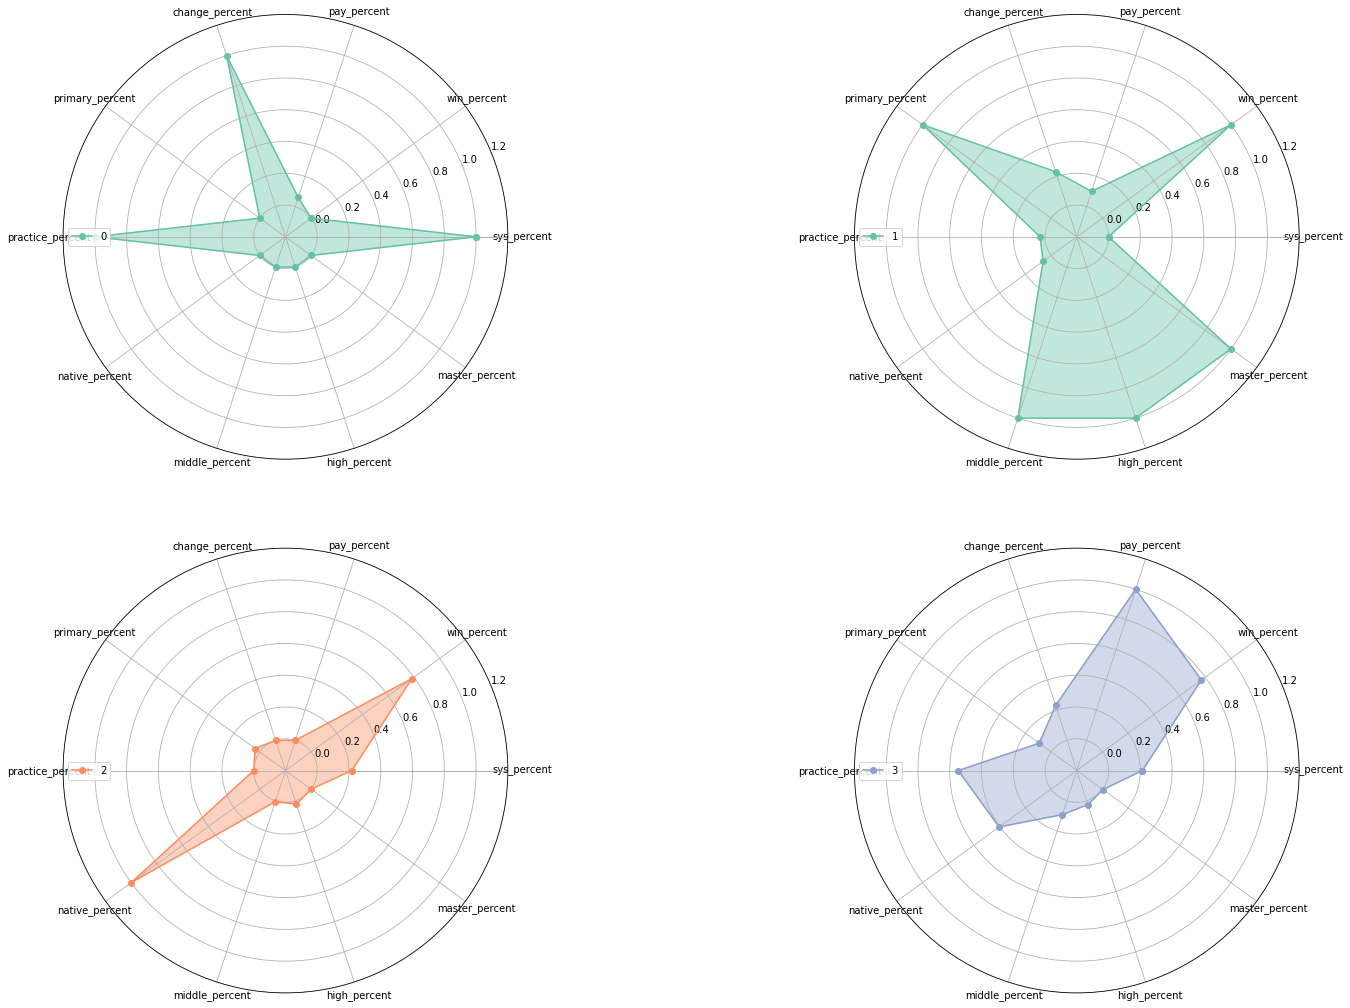

In [16]:
num_sets = cluster_pd.T.astype(np.float64)
minmax_data = MinMaxScaler().fit_transform(num_sets)
fig = plt.figure(figsize=(26,18))
labels = np.array(x_label)
my_palette = plt.cm.get_cmap("Set2", 10)
cor_list = ['b','g','r','c','m','y','k','b','g','r']
angles = np.linspace(0,2*np.pi,len(labels),endpoint=False)
angles = np.concatenate((angles,[angles[0]]))

for i in range(4):
    ax = fig.add_subplot(2,2,i+1,polar=True)
    data_tmp = minmax_data[i,:]
    data1 = np.concatenate((data_tmp,[data_tmp[0]]))
    ax.plot(angles,data1,'o-',c=my_palette(i),label=i);
    ax.fill(angles, data1, color=my_palette(i), alpha=0.4);
    ax.set_thetagrids(angles*180/np.pi,labels);
    ax.set_rlim(-0.2,1.2);
    plt.legend(loc=6);

### 以聚类为样本，用分类模型，预测其他用户的类别

In [54]:
data_fenlei = pd.read_csv('./sirendoudizhu_fenlei.csv',names=names,skiprows=1)

In [56]:
X2 = data_fenlei[x_label].values
labels1 = AgglomerativeClustering(n_clusters=4).fit_predict(X2)
data_fenlei['label1'] = labels1


In [60]:
data_fenlei.groupby('label1').size()

label1
0    21719
1     1698
2     5337
3     5132
dtype: int64

In [58]:
cluster_features1 = []
for line in range(4):
    label_data = data[data['label1']== line]
    part1_data = label_data[x_label]
    part1_desc = part1_data.describe().round(3)
    merge_data1 = part1_desc.iloc[1]
    cluster_features1.append(merge_data1)
cluster_pd1 = pd.DataFrame(cluster_features1).T
cluster_pd1

,mean,mean,mean,mean
sys_percent,68.403,49.999,54.012,53.923
win_percent,31.544,49.943,45.969,45.703
pay_percent,0.039,0.053,0.018,0.365
change_percent,0.013,0.003,0.000,0.003
primary_percent,0.091,38.685,1.464,3.670
practice_percent,98.559,6.984,4.057,55.725
native_percent,1.348,7.150,93.966,38.820
middle_percent,0.002,13.453,0.085,1.240
high_percent,0.000,19.195,0.428,0.488
master_percent,0.000,14.534,0.000,0.058


(<a list of 22 Line2D ticklines objects>,
 <a list of 11 Text major ticklabel objects>)

(-0.2, 1.2)

(<a list of 22 Line2D ticklines objects>,
 <a list of 11 Text major ticklabel objects>)

(-0.2, 1.2)

(<a list of 22 Line2D ticklines objects>,
 <a list of 11 Text major ticklabel objects>)

(-0.2, 1.2)

(<a list of 22 Line2D ticklines objects>,
 <a list of 11 Text major ticklabel objects>)

(-0.2, 1.2)

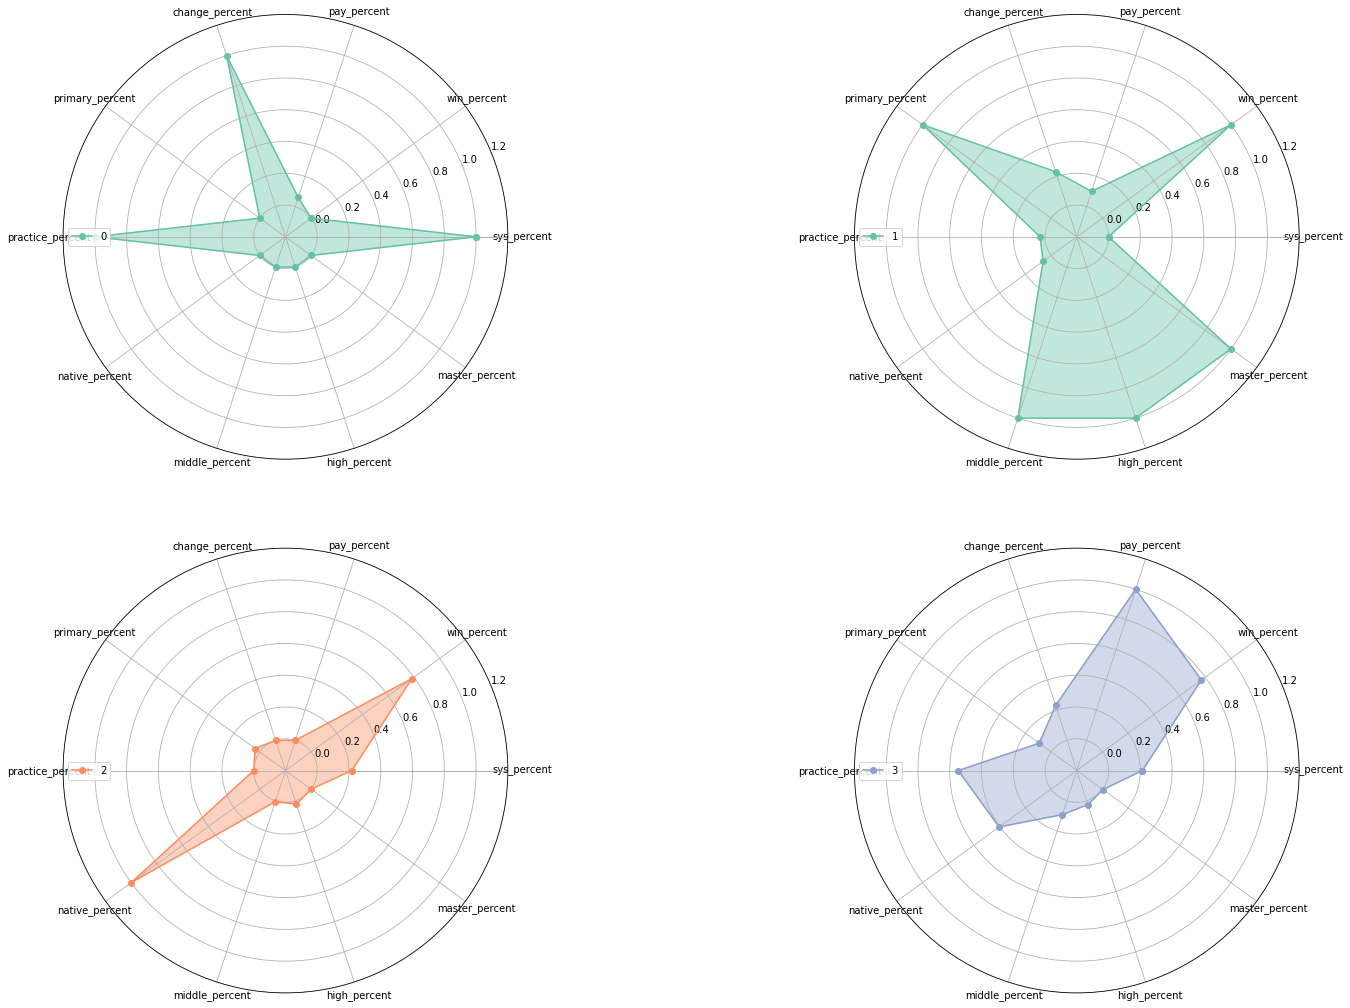

In [59]:
num_sets = cluster_pd1.T.astype(np.float64)
minmax_data = MinMaxScaler().fit_transform(num_sets)
fig = plt.figure(figsize=(26,18))
labels = np.array(x_label)
my_palette = plt.cm.get_cmap("Set2", 10)
cor_list = ['b','g','r','c','m','y','k','b','g','r']
angles = np.linspace(0,2*np.pi,len(labels),endpoint=False)
angles = np.concatenate((angles,[angles[0]]))

for i in range(4):
    ax = fig.add_subplot(2,2,i+1,polar=True)
    data_tmp = minmax_data[i,:]
    data1 = np.concatenate((data_tmp,[data_tmp[0]]))
    ax.plot(angles,data1,'o-',c=my_palette(i),label=i);
    ax.fill(angles, data1, color=my_palette(i), alpha=0.4);
    ax.set_thetagrids(angles*180/np.pi,labels);
    ax.set_rlim(-0.2,1.2);
    plt.legend(loc=6);

In [63]:
#!/usr/bin/env python3
# -*- coding: UTF-8 -*-
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
from sklearn.cluster import AgglomerativeClustering
import datetime

# 读取数据
date = datetime.datetime.now() - datetime.timedelta(days=1)
date = date.strftime('%Y%m%d')
file_name = "/data/veda/data/cluster/sirendoudizhu/cluster_data_"+date+".csv"
names = ["fbpid"
,"fuid"
,"sys_sum"
,"sys_percent"
,"win_sum"
,"win_percent"
,"pay_sum"
,"pay_percent"
,"change_sum"
,"change_percent"
,"coin_total"
,"primary_total_time"
,"primary_total_count"
,"primary_percent"
,"practice_total_time"
,"practice_total_count"
,"practice_percent"
,"native_total_time"
,"native_total_count"
,"native_percent"
,"middle_total_time"
,"middle_total_count"
,"middle_percent"
,"high_total_time"
,"high_total_count"
,"high_percent"
,"master_total_time"
,"master_total_count"
,"master_percent"
,"dt"]
file = pd.read_csv(file_name,names=names,skiprows=1)
file.dropna(inplace=True)

x_label = ["sys_percent","win_percent","pay_percent","change_percent","primary_percent","practice_percent","native_percent","middle_percent","high_percent","master_percent"]
X = file[x_label].values

labels = AgglomerativeClustering(n_clusters=4).fit_predict(X)
file['label'] = labels

result_column = ["fbpid","fuid","label","dt"]
result = file[result_column]

result_path = "/data/veda/data/cluster/sirendoudizhu/result_"+date+".csv"
result.to_csv(result_path,index=False)

'20180910'

### 构建模型

In [35]:
X_fenlei = data[label_ms].values
X_fenlei = MinMaxScaler().fit_transform(X_fenlei)
y = data['label1'].values

In [36]:
validation_size = 0.2
seed = 7
X_t,X_v,y_t,y_v = train_test_split(X_fenlei,y,test_size=validation_size,random_state=seed)